# Visualization

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from anndata import AnnData
from statannotations.Annotator import Annotator
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Input

In [2]:
# Load starmap dataset
sdata = sc.read_h5ad('Z:/Data/Analyzed/2021-08-25-Hu-HelaSTARmap/output/2021-12-22-Hu-HelaSTARmap-dr.h5ad')
sdata

AnnData object with n_obs × n_vars = 3783 × 991
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'phase_ref'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'max_counts', 'n_cells'
    layers: 'avgDR', 'cytoplasm', 'er', 'mid', 'nucleus', 'outer_cytoplasm', 'peri'

In [3]:
# Load ribomap dataset 
rdata = sc.read_h5ad('Z:/Data/Analyzed/2021-07-09-Hu-HelaRIBOmap/output/2021-12-22-Hu-HelaRIBOmap-dr.h5ad')
rdata

AnnData object with n_obs × n_vars = 2762 × 991
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'phase_ref'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'max_counts', 'n_cells'
    layers: 'avgDR', 'cytoplasm', 'er', 'mid', 'nucleus', 'outer_cytoplasm', 'peri'

## Plots

### 1. cell area

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

STARmap vs. RIBOmap: t-test independent samples, P_val:6.315e-53 t=1.545e+01


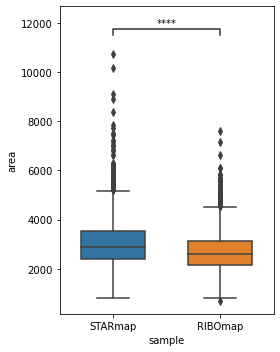

In [4]:
# input dataframe
sdata.obs['area'] = sdata.obs['area'] * 0.1420 * 0.1420 * 0.3463
rdata.obs['area'] = rdata.obs['area'] * 0.1420 * 0.1420 * 0.3463
obs_df = pd.concat([sdata.obs, rdata.obs])

fig, ax = plt.subplots(figsize=(4, 5))
ax = sns.boxplot(x="sample", y="area", data=obs_df, width=.6)

pairs=[("STARmap", "RIBOmap")]
annotator = Annotator(ax, pairs, data=obs_df, x="sample", y="area")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.tight_layout()
plt.savefig('figures/cell_volume_boxplot.pdf', dpi=200)

### 2. coding vs. non-coding

In [5]:
# reads ratio
coding_annotation = pd.read_excel('Z:/jiahao/Github/RIBOmap/other-datasets/TEMPOmap non-coding RNA.xlsx')
coding_annotation.index = coding_annotation['Gene']
coding_genes = coding_annotation.loc[coding_annotation['Non-coding RNA'] == 0, 'Gene'].to_list()
coding_genes = list(set(coding_genes) & set(sdata.var.index.to_list()))
non_coding_genes = coding_annotation.loc[coding_annotation['Non-coding RNA'] == 1, 'Gene'].to_list()

sframe = pd.DataFrame(sdata.X, columns=sdata.var.index, index=sdata.obs.index)
s_coding_reads = sframe.loc[:, coding_genes].values.sum()
s_non_coding_reads = sframe.loc[:, non_coding_genes].values.sum()

rframe = pd.DataFrame(rdata.X, columns=rdata.var.index, index=rdata.obs.index)
r_coding_reads = rframe.loc[:, coding_genes].values.sum()
r_non_coding_reads = rframe.loc[:, non_coding_genes].values.sum()

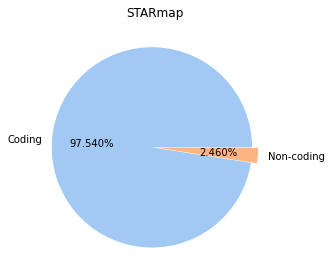

In [6]:
# reads ratio
data = [s_coding_reads, s_non_coding_reads]
labels = ['Coding', 'Non-coding']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.03f%%', explode=[0.03]*2)
plt.title('STARmap')
plt.tight_layout()
plt.savefig('figures/coding_reads_pie_starmap.pdf', dpi=200)

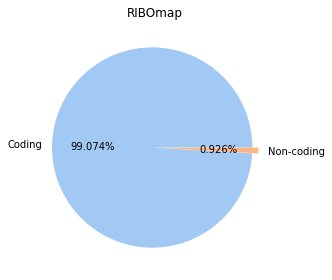

In [7]:
# reads ratio
data = [r_coding_reads, r_non_coding_reads]
labels = ['Coding', 'Non-coding']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.03f%%', explode=[0.03]*2)
plt.title('RIBOmap')
plt.tight_layout()
plt.savefig('figures/coding_reads_pie_ribomap.pdf', dpi=200)

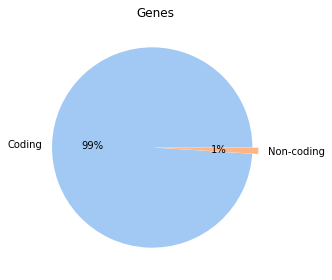

In [8]:
# gene ratio
data = [99, 1]
labels = ['Coding', 'Non-coding']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=[0.03]*2)
plt.title('Genes')
plt.tight_layout()
plt.savefig('figures/coding_gene_pie.pdf', dpi=200)

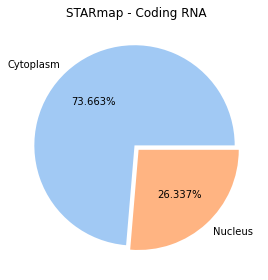

In [8]:
# reads rato cyto vs. nuc (coding)
sframe_cyto = pd.DataFrame(sdata.layers['cytoplasm'], columns=sdata.var.index, index=sdata.obs.index)
s_coding_cyto = sframe_cyto.loc[:, coding_genes].values.sum()
sframe_nuc = pd.DataFrame(sdata.layers['nucleus'], columns=sdata.var.index, index=sdata.obs.index)
s_coding_nuc = sframe_nuc.loc[:, coding_genes].values.sum()

data = [s_coding_cyto, s_coding_nuc]
labels = ['Cytoplasm', 'Nucleus']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.03f%%', explode=[0.03]*2)
plt.title('STARmap - Coding RNA')
plt.tight_layout()
# plt.savefig('figures/coding_reads_pie_starmap.pdf', dpi=200)

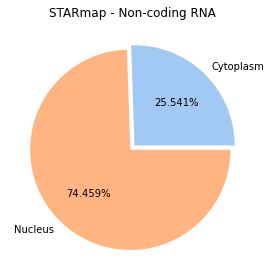

In [9]:
# reads rato cyto vs. nuc (coding)
sframe_cyto = pd.DataFrame(sdata.layers['cytoplasm'], columns=sdata.var.index, index=sdata.obs.index)
s_non_coding_cyto = sframe_cyto.loc[:, non_coding_genes].values.sum()
sframe_nuc = pd.DataFrame(sdata.layers['nucleus'], columns=sdata.var.index, index=sdata.obs.index)
s_non_coding_nuc = sframe_nuc.loc[:, non_coding_genes].values.sum()

data = [s_non_coding_cyto, s_non_coding_nuc]
labels = ['Cytoplasm', 'Nucleus']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.03f%%', explode=[0.03]*2)
plt.title('STARmap - Non-coding RNA')
plt.tight_layout()
# plt.savefig('figures/coding_reads_pie_starmap.pdf', dpi=200)

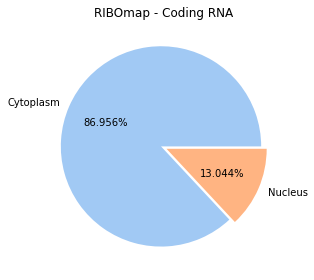

In [10]:
# reads rato cyto vs. nuc (coding)
rframe_cyto = pd.DataFrame(rdata.layers['cytoplasm'], columns=rdata.var.index, index=rdata.obs.index)
r_coding_cyto = rframe_cyto.loc[:, coding_genes].values.sum()
rframe_nuc = pd.DataFrame(rdata.layers['nucleus'], columns=rdata.var.index, index=rdata.obs.index)
r_coding_nuc = rframe_nuc.loc[:, coding_genes].values.sum()

data = [r_coding_cyto, r_coding_nuc]
labels = ['Cytoplasm', 'Nucleus']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.03f%%', explode=[0.03]*2)
plt.title('RIBOmap - Coding RNA')
plt.tight_layout()
# plt.savefig('figures/coding_reads_pie_starmap.pdf', dpi=200)

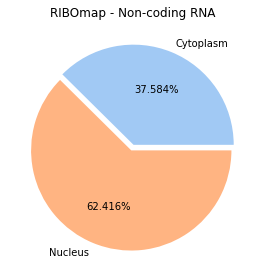

In [11]:
# reads rato cyto vs. nuc (coding)
rframe_cyto = pd.DataFrame(rdata.layers['cytoplasm'], columns=rdata.var.index, index=rdata.obs.index)
r_non_coding_cyto = rframe_cyto.loc[:, non_coding_genes].values.sum()
rframe_nuc = pd.DataFrame(rdata.layers['nucleus'], columns=rdata.var.index, index=rdata.obs.index)
r_non_coding_nuc = rframe_nuc.loc[:, non_coding_genes].values.sum()

data = [r_non_coding_cyto, r_non_coding_nuc]
labels = ['Cytoplasm', 'Nucleus']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.03f%%', explode=[0.03]*2)
plt.title('RIBOmap - Non-coding RNA')
plt.tight_layout()
# plt.savefig('figures/coding_reads_pie_starmap.pdf', dpi=200)

In [17]:
# coding vs. non-coding in cyto
sframe = pd.DataFrame(sdata.layers['cytoplasm'], columns=sdata.var.index, index=sdata.obs.index)
s_coding_reads = sframe.loc[:, coding_genes].values.sum()
s_non_coding_reads = sframe.loc[:, non_coding_genes].values.sum()

rframe = pd.DataFrame(rdata.layers['cytoplasm'], columns=rdata.var.index, index=rdata.obs.index)
r_coding_reads = rframe.loc[:, coding_genes].values.sum()
r_non_coding_reads = rframe.loc[:, non_coding_genes].values.sum()

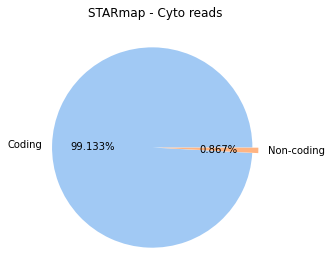

In [20]:
# reads ratio
data = [s_coding_reads, s_non_coding_reads]
labels = ['Coding', 'Non-coding']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.03f%%', explode=[0.03]*2)
plt.title('STARmap - Cyto reads')
plt.tight_layout()
# plt.savefig('figures/coding_reads_pie_starmap.pdf', dpi=200)

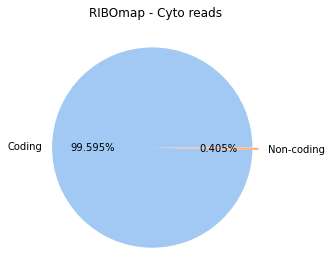

In [21]:
# reads ratio
data = [r_coding_reads, r_non_coding_reads]
labels = ['Coding', 'Non-coding']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.03f%%', explode=[0.03]*2)
plt.title('RIBOmap - Cyto reads')
plt.tight_layout()
# plt.savefig('figures/coding_reads_pie_ribomap.pdf', dpi=200)

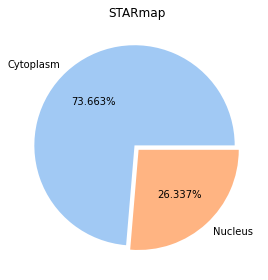

In [54]:
# reads rato cyto vs. nuc (coding)
sframe_cyto = pd.DataFrame(sdata.layers['cytoplasm'], columns=sdata.var.index, index=sdata.obs.index)
s_coding_cyto = sframe_cyto.values.sum()
sframe_nuc = pd.DataFrame(sdata.layers['nucleus'], columns=sdata.var.index, index=sdata.obs.index)
s_coding_nuc = sframe_nuc.values.sum()

data = [s_coding_cyto, s_coding_nuc]
labels = ['Cytoplasm', 'Nucleus']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.03f%%', explode=[0.03]*2)
plt.title('STARmap')
plt.tight_layout()
# plt.savefig('figures/coding_reads_pie_starmap.pdf', dpi=200)

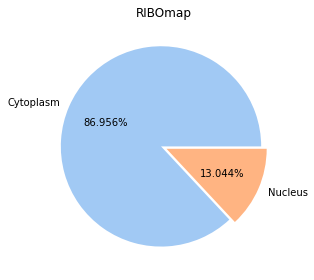

In [55]:
# reads rato cyto vs. nuc (coding)
rframe_cyto = pd.DataFrame(rdata.layers['cytoplasm'], columns=rdata.var.index, index=rdata.obs.index)
r_coding_cyto = rframe_cyto.values.sum()
rframe_nuc = pd.DataFrame(rdata.layers['nucleus'], columns=rdata.var.index, index=rdata.obs.index)
r_coding_nuc = rframe_nuc.values.sum()

data = [r_coding_cyto, r_coding_nuc]
labels = ['Cytoplasm', 'Nucleus']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.03f%%', explode=[0.03]*2)
plt.title('RIBOmap')
plt.tight_layout()
# plt.savefig('figures/coding_reads_pie_starmap.pdf', dpi=200)

### 3. distance ratio

In [9]:
# Load gene annotation 
gene_annotation = pd.read_excel('Z:/jiahao/Github/RIBOmap/other-datasets/TEMPOmap non-coding RNA.xlsx')
gene_annotation.index = gene_annotation['Gene']
gene_annotation

# merge var and gene_annotation
sdata.var = sdata.var.join(gene_annotation)
sdata.var = sdata.var.drop(columns='Gene')
sdata.var

rdata.var = rdata.var.join(gene_annotation)
rdata.var = rdata.var.drop(columns='Gene')

In [10]:
# Filter out non-coding rnas

sdata = sdata[:, sdata.var['Non-coding RNA'] == 0]
rdata = rdata[:, rdata.var['Non-coding RNA'] == 0]

In [11]:
# Distance ratio dataframe of starmap
sframe_dr = pd.DataFrame(sdata.layers['avgDR'], columns=sdata.var.index, index=sdata.obs.index)
sframe_dr_per_gene = sframe_dr.mean(axis=0)
sframe_dr_per_cell = sframe_dr.mean(axis=1)
sdata.var['distance-ratio'] = sframe_dr_per_gene
sdata.obs['distance-ratio'] = sframe_dr_per_cell

# Distance ratio dataframe of ribomap
rframe_dr = pd.DataFrame(rdata.layers['avgDR'], columns=rdata.var.index, index=rdata.obs.index)
rframe_dr_per_gene = rframe_dr.mean(axis=0)
rframe_dr_per_cell = rframe_dr.mean(axis=1)
rdata.var['distance-ratio'] = rframe_dr_per_gene
rdata.obs['distance-ratio'] = rframe_dr_per_cell

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


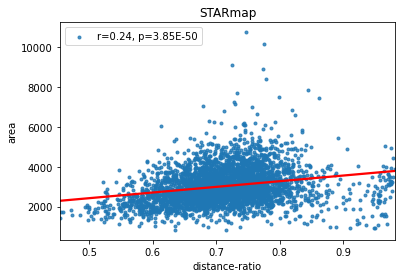

In [12]:
slope, intercept, r_value, pv, se = stats.linregress(sdata.obs['distance-ratio'], sdata.obs['area'])

sns.regplot(x="distance-ratio", y="area", data=sdata.obs, 
  ci=None, label=f"r={r_value:.2f}, p={pv:.2E}", marker='.', line_kws={"color": "red"})
plt.title('STARmap')
plt.legend()
plt.show()

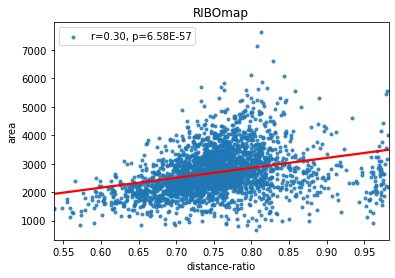

In [13]:
slope, intercept, r_value, pv, se = stats.linregress(rdata.obs['distance-ratio'], rdata.obs['area'])

sns.regplot(x="distance-ratio", y="area", data=rdata.obs, 
  ci=None, label=f"r={r_value:.2f}, p={pv:.2E}", marker='.', line_kws={"color": "red"})
plt.title('RIBOmap')
plt.legend()
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

STARmap vs. RIBOmap: t-test independent samples, P_val:6.521e-107 t=-2.237e+01


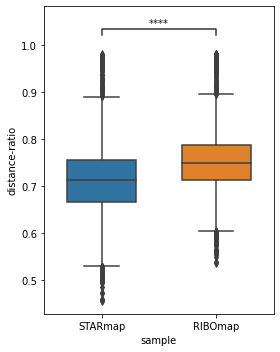

In [14]:
# per cell
obs_df = pd.concat([sdata.obs, rdata.obs])

# # test normalize
# obs_df['distance-ratio'] = obs_df['distance-ratio'] / obs_df['area']
# obs_df['distance-ratio'] = (obs_df['distance-ratio'] - obs_df['distance-ratio'].min()) / obs_df['distance-ratio'].max()

fig, ax = plt.subplots(figsize=(4, 5))
ax = sns.boxplot(x="sample", y="distance-ratio", data=obs_df, width=.6)

pairs=[("STARmap", "RIBOmap")]
annotator = Annotator(ax, pairs, data=obs_df, x="sample", y="distance-ratio")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.tight_layout()
plt.savefig('figures/distance-ratio_boxplot_cell.pdf', dpi=200)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

STARmap vs. RIBOmap: t-test independent samples, P_val:6.317e-258 t=-4.017e+01


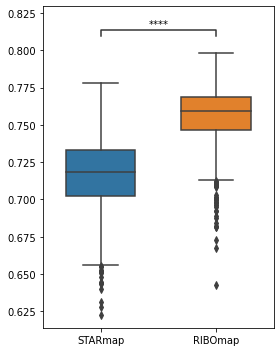

In [15]:
# per gene
var_df = sdata.var.copy()
var_df['STARmap'] = sdata.var['distance-ratio']
var_df['RIBOmap'] = rdata.var['distance-ratio']
var_df

fig, ax = plt.subplots(figsize=(4, 5))
ax = sns.boxplot(data=var_df, order=["STARmap", "RIBOmap"], width=.6)

pairs=[("STARmap", "RIBOmap")]
annotator = Annotator(ax, pairs, data=var_df, order=["STARmap", "RIBOmap"])
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.tight_layout()
plt.savefig('figures/distance-ratio_boxplot_gene.pdf', dpi=200)

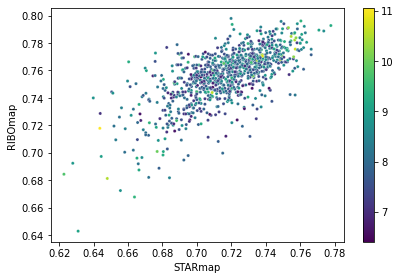

In [16]:
norm = plt.Normalize(var_df['log1p_total_counts'].min(), var_df['log1p_total_counts'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

ax = sns.scatterplot(x='STARmap', y='RIBOmap', data=var_df, s=10, hue='log1p_total_counts', palette='viridis')
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.tight_layout()
plt.savefig('figures/distance-ratio_scatter.pdf', dpi=200)

In [17]:
# calculate difference
var_df['dr_diff'] = var_df['RIBOmap'] - var_df['STARmap']
var_df['dr_diff_bolean'] = var_df['dr_diff'] > (var_df['dr_diff'].quantile(q=.85))

<AxesSubplot:xlabel='dr_diff', ylabel='Density'>

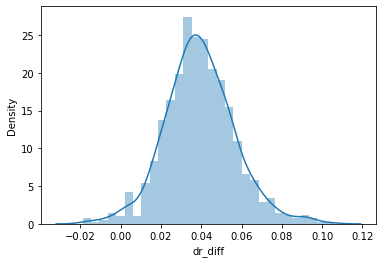

In [18]:
sns.distplot(var_df['dr_diff'])

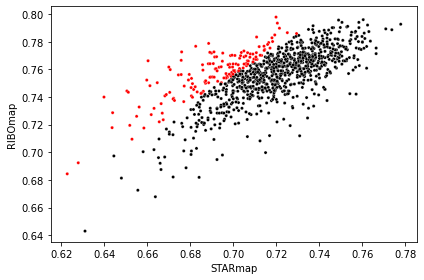

In [19]:
# Get colormap
boolean_pl = sns.color_palette(['#000000', '#ff0000'])
# cluster_cmap = ListedColormap(boolean_pl.as_hex())
# ns.palplot(boolean_pl)

ax = sns.scatterplot(x='STARmap', y='RIBOmap', data=var_df, s=10, hue='dr_diff_bolean', legend=False, palette=boolean_pl)
plt.tight_layout()
plt.savefig('figures/distance-ratio_scatter_boolean.pdf', dpi=200)

#### split based on cell cycle

In [20]:
# Distance ratio dataframe of starmap
sframe_dr = pd.DataFrame(sdata.layers['avgDR'], columns=sdata.var.index, index=sdata.obs.index)
sframe_dr['phase_ref'] = sdata.obs['phase_ref']
sframe_dr['phase_ref'] = sframe_dr['phase_ref'].astype(object)
sframe_dr.loc[sframe_dr['phase_ref'] != 'G2M', 'phase_ref'] = 'G1S'
starmap_dr_cc = sframe_dr.groupby('phase_ref').median()
starmap_dr_cc = starmap_dr_cc.T

# Distance ratio dataframe of ribomap
rframe_dr = pd.DataFrame(rdata.layers['avgDR'], columns=rdata.var.index, index=rdata.obs.index)
rframe_dr['phase_ref'] = rdata.obs['phase_ref']
rframe_dr['phase_ref'] = rframe_dr['phase_ref'].astype(object)
rframe_dr.loc[rframe_dr['phase_ref'] != 'G2M', 'phase_ref'] = 'G1S'
ribomap_dr_cc = rframe_dr.groupby('phase_ref').median()
ribomap_dr_cc = ribomap_dr_cc.T

var_df_g1s = pd.DataFrame([starmap_dr_cc['G1S'], ribomap_dr_cc['G1S']])
var_df_g1s = var_df_g1s.T
var_df_g1s.columns = ['STARmap', 'RIBOmap']

var_df_g2m = pd.DataFrame([starmap_dr_cc['G2M'], ribomap_dr_cc['G2M']])
var_df_g2m = var_df_g2m.T
var_df_g2m.columns = ['STARmap', 'RIBOmap']

In [37]:
# calculate difference
var_df_g1s['dr_diff'] = var_df_g1s['RIBOmap'] - var_df_g1s['STARmap']
#var_df_g1s['dr_diff_bolean'] = var_df_g1s['dr_diff'] > (var_df_g1s['dr_diff'].quantile(q=.85))
var_df_g1s['dr_diff_bolean'] = var_df_g1s['dr_diff'] < (var_df_g1s['dr_diff'].quantile(q=.15))

var_df_g2m['dr_diff'] = var_df_g2m['RIBOmap'] - var_df_g2m['STARmap']
#var_df_g2m['dr_diff_bolean'] = var_df_g2m['dr_diff'] > (var_df_g2m['dr_diff'].quantile(q=.85))
var_df_g2m['dr_diff_bolean'] = var_df_g2m['dr_diff'] < (var_df_g2m['dr_diff'].quantile(q=.15))

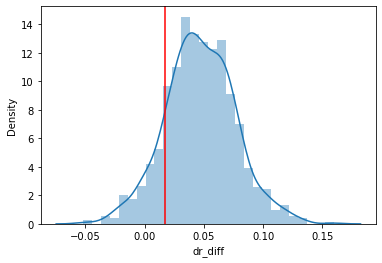

In [46]:
sns.distplot(var_df_g2m['dr_diff'])
plt.axvline(var_df_g2m['dr_diff'].quantile(q=.15), c='red')
plt.show()

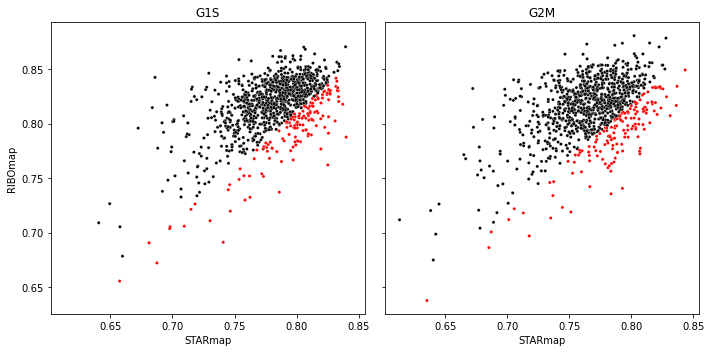

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)
sns.scatterplot(x='STARmap', y='RIBOmap', data=var_df_g1s, s=10, hue='dr_diff_bolean', 
                legend=False, palette=boolean_pl, ax=ax1)
sns.scatterplot(x='STARmap', y='RIBOmap', data=var_df_g2m, s=10, hue='dr_diff_bolean', 
                legend=False, palette=boolean_pl, ax=ax2)
ax1.title.set_text('G1S')
ax2.title.set_text('G2M')
plt.tight_layout()
plt.savefig('figures/distance-ratio_scatter_boolean_cc.pdf', dpi=200)

In [41]:
g1s_genes = var_df_g1s.loc[var_df_g1s['dr_diff_bolean'] == True, :].index.to_list()
g2m_genes = var_df_g2m.loc[var_df_g2m['dr_diff_bolean'] == True, :].index.to_list()
print(len(g1s_genes))
print(len(g2m_genes))
# for i in var_df_g1s.loc[var_df['dr_diff_bolean'] == True, :].index.to_list():
#     print(i, end=' ')

147
147


In [45]:
for i in g1s_genes:
    # print(i, end=' ')
    print(i)

CTGF
DLX4
RHOB
S100A6
SAMD1
ABCC1
ABL1
ADAT1
AP2S1
ARHGAP17
ATP10D
ATP1A1
BACE2
BCL2L1
BCL9L
BCOR
BDKRB2
BICD1
C6ORF89
CANX
CCM2
CCNF
CDC16
CHD4
CHST15
CKAP4
CKS1B
CNOT1
CPD
CRIP2
CSRNP1
CSTB
CSTF1
CTNNA1
DDIT4
DNAJB1
DPF2
DTL
DUSP1
DYNC1H1
EEF2
EP300
ESYT1
ETS2
ETV3
EXTL3
FAF2
FASN
FBXO31
FBXO34
FTO
GALNT2
GAPVD1
GEMIN4
GGA3
GJC1
GMNN
GNPNAT1
GSN
HEATR1
HEG1
HEXIM1
HNRNPA0
HNRNPF
ICMT
IGF1R
IGF2BP3
JAGN1
JRK
JUND
KCTD2
KIAA0100
KLHL13
LAMB1
LGALS3BP
LIN28B
LNPEP
LRRC8D
MAPK8IP3
MCM2
MFHAS1
MGA
MGAT5
MID1IP1
MRPL34
MYC
MYL9
NACC2
NCAPG
NDUFS3
NDUFS4
NFATC3
NFIC
NFIL3
NIPBL
NUP160
OLFM1
PCYOX1
PHLDB2
PIGC
PMPCA
PODXL
PPIL2
PPM1B
PPM1G
PPRC1
PRPF8
RNF145
RPA3
RPS28
SCARA3
SEC61G
SERPINH1
SETD1B
SETX
SF3B1
SH3BP4
SLC12A7
SLC25A25
SLC7A5
SREBF1
SRSF9
TAB2
TACC3
TCF20
TET3
THBS1
TMEM126B
TMEM186
TRIM52
TRMT112
TSFM
TSHZ1
TXNDC17
UBE3A
UMPS
UNC45A
WBP1
WDR83OS
YBX3
ZBED4
ZBTB38
ZBTB4
ZBTB5
ZCCHC14
ZFHX3
ZNF207


In [43]:
for i in list(set(g1s_genes) & set(g2m_genes)):
    # print(i, end=' ')
    print(i)

CANX
THBS1
MGAT5
HEG1
TSHZ1
SAMD1
HNRNPF
CKAP4
MAPK8IP3
HEXIM1
ETS2
CCM2
CDC16
YBX3
ZBTB38
CSTB
ARHGAP17
FAF2
MFHAS1
MYL9
SF3B1
UBE3A
DNAJB1
ATP1A1
SETD1B
SLC7A5
OLFM1
SH3BP4
NDUFS4
NCAPG
BCL2L1
ZBTB5
ETV3
PCYOX1
CSRNP1
RHOB
SLC25A25
CTGF
CSTF1
LAMB1
CTNNA1
BCOR
NFIC
PHLDB2
DUSP1
HNRNPA0
WDR83OS
JAGN1
ZBED4
ESYT1
RNF145
ABCC1
FBXO34
ADAT1
DPF2
GEMIN4
EXTL3
SERPINH1
PODXL
AP2S1
ZFHX3
PPIL2
BCL9L
GJC1
S100A6
EEF2
CCNF
CNOT1
PRPF8
ABL1
MID1IP1
ICMT
NIPBL
PPM1G
CHD4
GMNN
SREBF1
BACE2
SCARA3


In [44]:
len(set(g1s_genes) & set(g2m_genes))

79

### 4. cell cycle

In [114]:
# sdata_cc = sc.read_h5ad('Z:/Data/Analyzed/2021-08-25-Hu-HelaSTARmap/output/2021-10-06-Hu-HelaSTARmap-cc.h5ad')
# rdata_cc = sc.read_h5ad('Z:/Data/Analyzed/2021-07-09-Hu-HelaRIBOmap/output/2021-10-06-Hu-HelaRIBOmap-cc.h5ad')

In [137]:
# dataset = 'STARmap'
dataset = 'RIBOmap'
use_ref = True

if dataset == 'STARmap':
    base_path = 'Z:/Data/Analyzed/2021-08-25-Hu-HelaSTARmap'
    input_file = 'Z:/Data/Analyzed/2021-08-25-Hu-HelaSTARmap/output/2021-10-06-Hu-HelaSTARmap-cc.h5ad'
else:
    base_path = 'Z:/Data/Analyzed/2021-07-09-Hu-HelaRIBOmap'
    input_file = 'Z:/Data/Analyzed/2021-07-09-Hu-HelaRIBOmap/output/2021-10-06-Hu-HelaRIBOmap-cc.h5ad'

adata = sc.read_h5ad(input_file)

if use_ref:
    # Load reference gene list 
    cell_cycle_genes = [x.strip() for x in open(os.path.join(base_path, 'gene_modules/regev_lab_cell_cycle_genes.txt'))]
    s_genes = cell_cycle_genes[:43]
    g2m_genes = cell_cycle_genes[43:]
else:
    # Load self defined markers 
    s_genes = pd.read_excel(os.path.join(base_path, 'gene_modules/cell_cycle_markers.xlsx'), sheet_name='G1_S', header=None)[0].to_list()
    g2m_genes = pd.read_excel(os.path.join(base_path, 'gene_modules/cell_cycle_markers.xlsx'), sheet_name='G2_M', header=None)[0].to_list()
    cell_cycle_genes = s_genes + g2m_genes

In [138]:
# Get cell cycle genes 
missed_genes = [x for x in cell_cycle_genes if x not in adata.var_names]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
s_genes_true = [x for x in s_genes if x in adata.var_names]
g2m_genes_true = [x for x in g2m_genes if x in adata.var_names]

print(len(cell_cycle_genes), len(missed_genes))
print(f"G1/S genes: {len(s_genes)} - G2/M genes: {len(g2m_genes)}")
print(f"G1/S genes in our dataest: {len(s_genes_true)} - G2/M genes in our dataest: {len(g2m_genes_true)}")

38 59
G1/S genes: 43 - G2/M genes: 54
G1/S genes in our dataest: 17 - G2/M genes in our dataest: 21


Trying to set attribute `.obs` of view, copying.
... storing 'phase_ref' as categorical


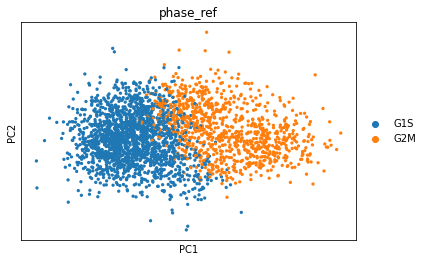

In [278]:
# Compute gene set score
adata_cc_genes = adata[:, cell_cycle_genes]
adata_cc_genes.obs['phase_ref'] = adata_cc_genes.obs['phase_ref'].astype(object)
adata_cc_genes.obs.loc[adata_cc_genes.obs['phase_ref'] != 'G2M', 'phase_ref'] = 'G1S'
sc.tl.pca(adata_cc_genes)
sc.pl.pca(adata_cc_genes, color='phase_ref', save=f'_{dataset}.pdf')

### 5. m6A

In [27]:
# Load gene annotation 
non_m6a_genes = pd.read_excel('Z:/jiahao/Github/RIBOmap/other-datasets/Gene list of m6A vs non-m6A.xlsx', sheet_name='non-m6A human', header=None)
non_m6a_genes[0] = non_m6a_genes[0].str.strip()
non_m6a_genes = non_m6a_genes[0].to_list()
print(f'Number of non-m6A genes: {len(non_m6a_genes)}')
m6a_genes = pd.read_excel('Z:/jiahao/Github/RIBOmap/other-datasets/Gene list of m6A vs non-m6A.xlsx', sheet_name='m6A gene human', header=None)
m6a_genes[0] = m6a_genes[0].str.strip()
m6a_genes = m6a_genes[0].to_list()
print(f'Number of m6A genes: {len(m6a_genes)}')

Number of non-m6A genes: 3375
Number of m6A genes: 3239


In [28]:
# per gene
s_var_df = pd.DataFrame()
s_var_df['Gene'] = sdata.var.index
s_var_df['sample'] = 'STARmap'
s_var_df['distance-ratio'] = sdata.var['distance-ratio'].values
s_var_df['m6A_annotation'] = 'NA'
s_var_df.loc[s_var_df['Gene'].isin(non_m6a_genes), 'm6A_annotation'] = 'Non-m6A gene'
s_var_df.loc[s_var_df['Gene'].isin(m6a_genes), 'm6A_annotation'] = 'm6A gene'
print(s_var_df['m6A_annotation'].value_counts())

r_var_df = pd.DataFrame()
r_var_df['Gene'] = rdata.var.index
r_var_df['sample'] = 'RIBOmap'
r_var_df['distance-ratio'] = rdata.var['distance-ratio'].values
r_var_df['m6A_annotation'] = 'NA'
r_var_df.loc[r_var_df['Gene'].isin(non_m6a_genes), 'm6A_annotation'] = 'Non-m6A gene'
r_var_df.loc[r_var_df['Gene'].isin(m6a_genes), 'm6A_annotation'] = 'm6A gene'

var_df = pd.concat([s_var_df, r_var_df])
var_df = var_df.loc[var_df['m6A_annotation'] != 'NA', :]

m6A gene        562
NA              310
Non-m6A gene    109
Name: m6A_annotation, dtype: int64


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

RIBOmap_m6A gene vs. RIBOmap_Non-m6A gene: t-test independent samples, P_val:4.642e-01 t=-7.324e-01
STARmap_m6A gene vs. STARmap_Non-m6A gene: t-test independent samples, P_val:5.269e-01 t=-6.331e-01


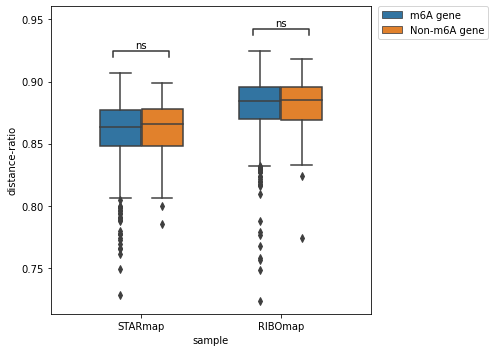

In [29]:
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.boxplot(data=var_df, x='sample', y='distance-ratio',  hue='m6A_annotation', 
                 width=.6)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

pairs=[(("STARmap", "m6A gene"), ("STARmap", "Non-m6A gene")),
      (("RIBOmap", "m6A gene"), ("RIBOmap", "Non-m6A gene"))]
annotator = Annotator(ax, pairs, data=var_df, x='sample', y='distance-ratio', hue='m6A_annotation')
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.tight_layout()
plt.savefig('figures/distance-ratio_boxplot_gene_m6A.pdf', dpi=200)

## Test

In [2]:
# fig = go.Figure(data=go.Scatter(
#     y = np.random.randn(500),
#     mode='markers',
#     marker=dict(
#         size=16,
#         color=np.random.randn(500), #set color equal to a variable
#         colorscale='Viridis', # one of plotly colorscales
#         showscale=True
#     )
# ))

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500
# )

# fig.show()